<a href="https://colab.research.google.com/github/davisjm4/CSAProjects/blob/main/DGD_EOC_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.5 MB/s eta 0:00:00


Performance report generated: performance_report.csv


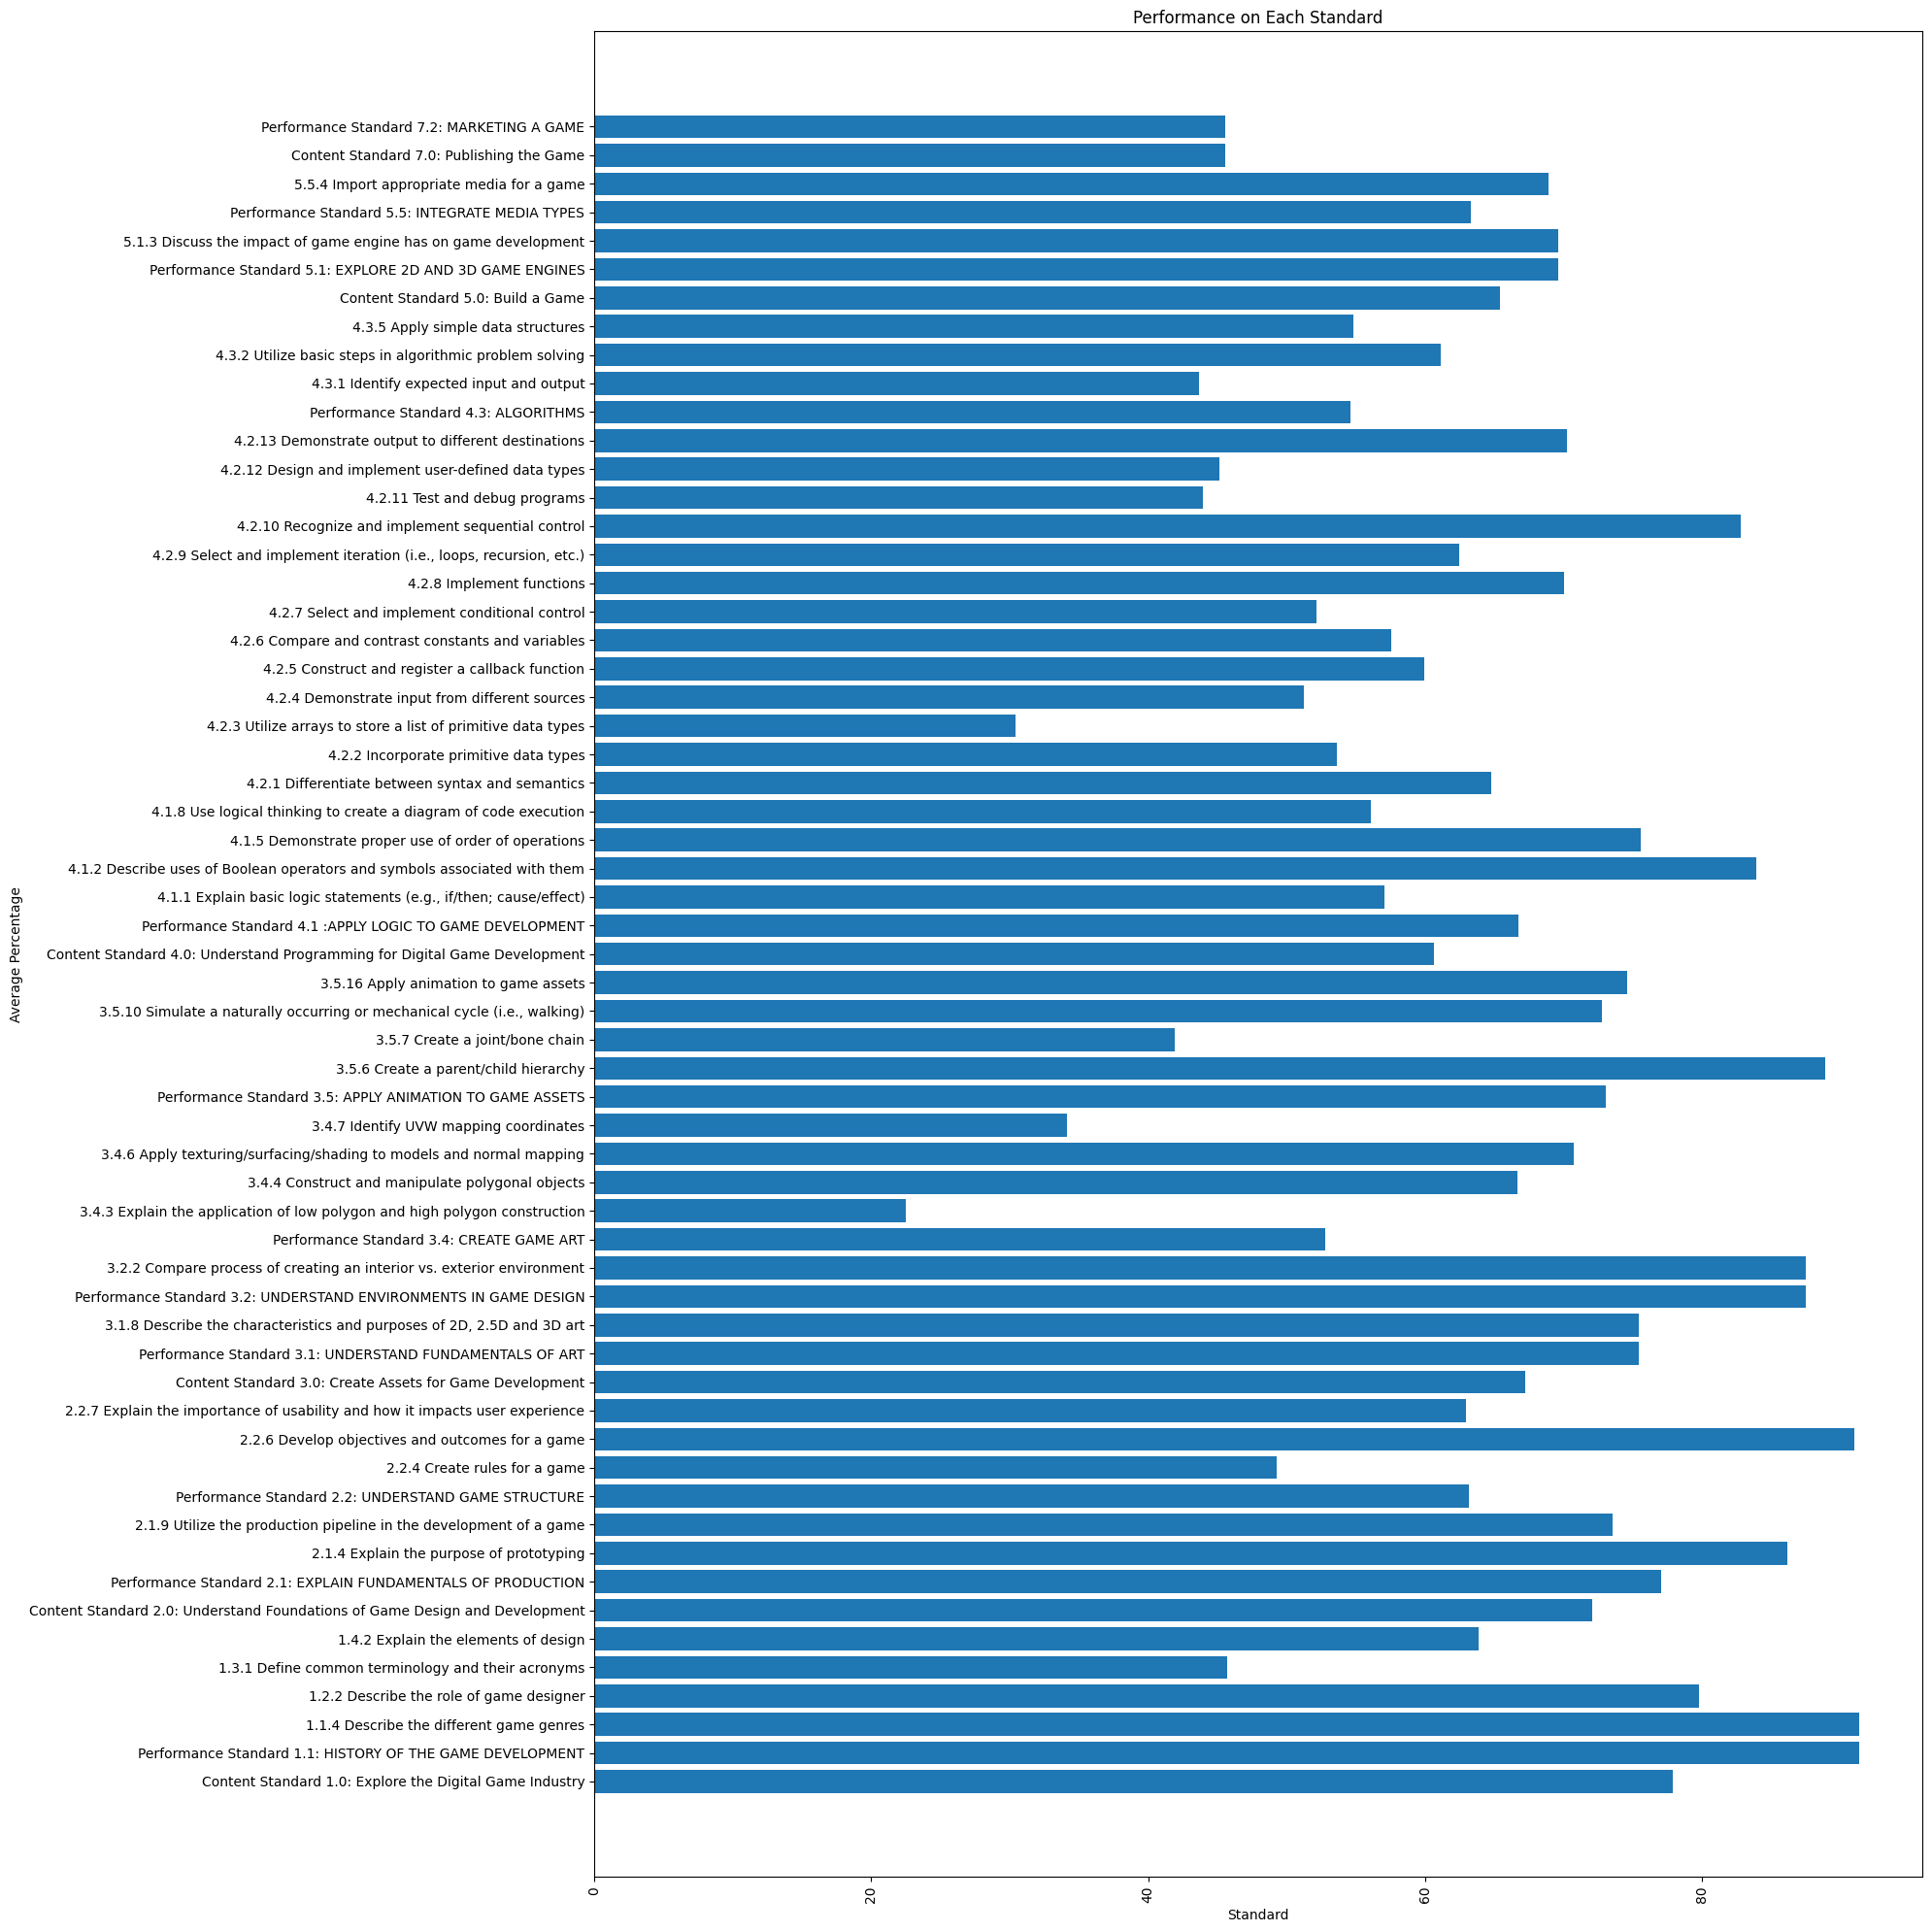

In [21]:
import os
import csv
import re
from PyPDF2 import PdfReader
import matplotlib.pyplot as plt

def extract_data_from_pdf(pdf_path):
    data = []
    with open(pdf_path, "rb") as file:
        reader = PdfReader(file)
        num_pages = len(reader.pages)

        for page_num in range(num_pages):
            page = reader.pages[page_num]
            text = page.extract_text()

            # Extract the standard name and percentage using regular expressions
            pattern = r"\d+\)\s*(.*?)\s+(\d+\.\d+)%"
            matches = re.findall(pattern, text)

            for match in matches:
                standard_name = match[0]
                percentage = float(match[1])
                data.append((standard_name, percentage))

    return data

def compile_data(pdf_folder):
    data = []
    for filename in os.listdir(pdf_folder):
        if filename.endswith(".pdf"):
            pdf_path = os.path.join(pdf_folder, filename)
            data += extract_data_from_pdf(pdf_path)

    return data

def generate_report(data):
    # Calculate overall performance on each standard
    standard_performance = {}
    for standard, percentage in data:
        if standard in standard_performance:
            standard_performance[standard].append(percentage)
        else:
            standard_performance[standard] = [percentage]

    # Calculate the average performance for each standard
    for standard, performances in standard_performance.items():
        average_percentage = sum(performances) / len(performances)
        standard_performance[standard] = average_percentage

    # Generate the report
    report_file = "performance_report.csv"
    with open(report_file, "w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Standard", "Average Percentage"])

        for standard, percentage in standard_performance.items():
            writer.writerow([standard, percentage])

    print(f"Performance report generated: {report_file}")

     # Generate bar chart
    standards = list(standard_performance.keys())
    performances = list(standard_performance.values())


    plt.figure(figsize=(20, 20))
    plt.barh(standards, performances)
    plt.xlabel('Standard')
    plt.ylabel('Average Percentage')
    plt.title('Performance on Each Standard')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Specify the folder containing the PDF reports
pdf_folder = "/content/Standards"

# Compile the data from PDF reports
data = compile_data(pdf_folder)

# Generate the performance report
generate_report(data)




NameError: ignored

<Figure size 1000x600 with 0 Axes>